## Processing of DocLayNet dataset to be used by layout models of the Hugging Face hub (finetuning, inference)

- **Author**: [Pierre GUILLOU](https://www.linkedin.com/in/pierreguillou/)
- **Date**: 27/01/2023
- **Blog post**: [Document AI | Processing of DocLayNet dataset to be used by layout models of the Hugging Face hub (finetuning, inference)](https://medium.com/@pierre_guillou/document-ai-processing-of-doclaynet-dataset-to-be-used-by-layout-models-of-the-hugging-face-hub-308d8bd81cdb)

## Overview

### DocLayNet dataset

[DocLayNet dataset](https://github.com/DS4SD/DocLayNet) (IBM Research) provides page-by-page layout segmentation ground-truth using bounding-boxes for 11 distinct class labels on 80863 unique pages from 6 document categories. 

Until today, the dataset can be downloaded through direct links or as a dataset from Hugging Face datasets:
- direct links: [doclaynet_core.zip](https://codait-cos-dax.s3.us.cloud-object-storage.appdomain.cloud/dax-doclaynet/1.0.0/DocLayNet_core.zip) (28 GiB), [doclaynet_extra.zip](https://codait-cos-dax.s3.us.cloud-object-storage.appdomain.cloud/dax-doclaynet/1.0.0/DocLayNet_extra.zip) (7.5 GiB)
- Hugging Face dataset library: [dataset DocLayNet](https://huggingface.co/datasets/ds4sd/DocLayNet)

### Processing into a format facilitating its use by HF notebooks

These 2 options require the downloading of all the data (approximately 30GBi), which requires downloading time (about 45 mn in Google Colab) and a large space on the hard disk. These could limit experimentation for people with low resources.

Moreover, even when using the download via HF datasets library, it is necessary to download the EXTRA zip separately ([doclaynet_extra.zip](https://codait-cos-dax.s3.us.cloud-object-storage.appdomain.cloud/dax-doclaynet/1.0.0/DocLayNet_extra.zip), 7.5 GiB) to associate the annotated bounding boxes with the text extracted by OCR from the PDFs. This operation also requires additional code because the boundings boxes of the texts do not necessarily correspond to those annotated (a calculation of the percentage of area in common between the boundings boxes annotated and those of the texts makes it possible to make a comparison between them).

At last, in order to use Hugging Face notebooks on fine-tuning layout models like LayoutLMv3 or LiLT, DocLayNet data must be processed in a proper format.

For all these reasons, I decided to process the DocLayNet dataset:
- into 3 datasets of different sizes:
  - [DocLayNet small](https://huggingface.co/datasets/pierreguillou/DocLayNet-small) (about 1% of DocLayNet) < 1.000k document images (691 train, 64 val, 49 test)
  - [DocLayNet base](https://huggingface.co/datasets/pierreguillou/DocLayNet-base) (about 10% of DocLayNet) < 10.000k document images (6.910 train, 648 val, 499 test)
  - DocLayNet large with full dataset (to be done)
- with associated texts,
- and in a format facilitating their use by HF notebooks.

*Note: the layout HF notebooks will greatly help participants of the IBM [ICDAR 2023 Competition on Robust Layout Segmentation in Corporate Documents](https://ds4sd.github.io/icdar23-doclaynet/)!*

### HF notebooks

- [notebooks LayoutLM](https://github.com/NielsRogge/Transformers-Tutorials/tree/master/LayoutLM) (Niels Rogge)
- [notebooks LayoutLMv2](https://github.com/NielsRogge/Transformers-Tutorials/tree/master/LayoutLMv2) (Niels Rogge)
- [notebooks LayoutLMv3](https://github.com/NielsRogge/Transformers-Tutorials/tree/master/LayoutLMv3) (Niels Rogge)
- [notebooks LiLT](https://github.com/NielsRogge/Transformers-Tutorials/tree/master/LiLt) (Niels Rogge)
- [Document AI: Fine-tuning LiLT for document-understanding using Hugging Face Transformers](https://github.com/philschmid/document-ai-transformers/blob/main/training/lilt_funsd.ipynb) ([post](https://www.philschmid.de/fine-tuning-lilt#3-fine-tune-and-evaluate-lilt) of Phil Schmid)

## Setup

In [1]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 4.1 MB/s eta 0:00:00


## Download

### (Option 1) Download from the Deep Search model card

As said in the overview, this download will take about 45 mn in Google Colab and will not give access to the OCR text of the annotated bounding boxes.

In [3]:
%%time
from datasets import load_dataset

dataset = load_dataset("ds4sd/DocLayNet") # 11h36

Computing checksums: 100%|##########| 1/1 [03:17<00:00, 197.50s/it]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset doc_lay_net downloaded and prepared to /root/.cache/huggingface/datasets/ds4sd___doc_lay_net/2022.08/0.0.0/e8fd199223ca199ca49e4b83e96b9bf354d1a324134c6c6b895f0f823c156cb3. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 21min 46s, sys: 5min 9s, total: 26min 55s
Wall time: 43min 3s


In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'doc_category', 'collection', 'doc_name', 'page_no', 'objects'],
        num_rows: 69375
    })
    validation: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'doc_category', 'collection', 'doc_name', 'page_no', 'objects'],
        num_rows: 6489
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'doc_category', 'collection', 'doc_name', 'page_no', 'objects'],
        num_rows: 4999
    })
})

In [5]:
dataset["train"][0]

{'image_id': 0,
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1025x1025 at 0x7F34A1AFE130>,
 'width': 1025,
 'height': 1025,
 'doc_category': 'financial_reports',
 'collection': 'ann_reports_00_04_fancy',
 'doc_name': 'NYSE_F_2004.pdf',
 'page_no': 72,
 'objects': [{'category_id': 5,
   'image_id': '0',
   'id': 0,
   'area': 7612,
   'bbox': [72.35294342041016,
    55.47565841674805,
    372.2156982421875,
    20.452899932861328],
   'segmentation': [[72.35294342041016,
     55.47565841674805,
     72.35294342041016,
     75.92855834960938,
     444.5686340332031,
     75.92855834960938,
     444.5686340332031,
     55.47565841674805]],
   'iscrowd': False,
   'precedence': 0},
  {'category_id': 9,
   'image_id': '0',
   'id': 1,
   'area': 33444,
   'bbox': [100.19463348388672,
    117.51495361328125,
    789.3253784179688,
    42.3705940246582],
   'segmentation': [[100.19463348388672,
     117.51495361328125,
     100.19463348388672,
     159.8855438232422,
     88

### (Option 2) Download DocLayNet small

In [6]:
from datasets import load_dataset

dataset_small = load_dataset("pierreguillou/DocLayNet-small")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset doc_lay_net-small downloaded and prepared to /root/.cache/huggingface/datasets/pierreguillou___doc_lay_net-small/DocLayNet/1.0.0/5c9c886fef9e5a948c074112543416e45dec2b2360999a0379808eca9653fec4. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
dataset_small 

DatasetDict({
    train: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'pdf', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 691
    })
    validation: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'pdf', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 64
    })
    test: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'pdf', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 49
    })
})

In [35]:
id2label = {idx:label for idx,label in enumerate(dataset_small["train"].features["categories"].feature.names)}
id2label

{0: 'Caption',
 1: 'Footnote',
 2: 'Formula',
 3: 'List-item',
 4: 'Page-footer',
 5: 'Page-header',
 6: 'Picture',
 7: 'Section-header',
 8: 'Table',
 9: 'Text',
 10: 'Title'}

In [8]:
dataset_small["train"][0]

{'id': '0',
 'texts': ['Notes to the consolidated financial statements of Aegon N.V. ',
  'Note 50',
  '270',
  '50',
  'Summary of total financial assets and financial liabilities at fair value through profit or loss',
  'Investments for general account',
  'Investments for account of policyholders',
  'Investment contracts for account of policyholders',
  'Derivatives',
  'Borrowings ',
  'The table that follows summarizes the carrying amounts of financial assets and financial liabilities that are classified as at fair value ',
  'through profit or loss, with appropriate distinction between those financial assets and financial liabilities held for trading and those ',
  'that, upon initial recognition, were designated as at fair value through profit or loss.',
  'The Group manages certain portfolios on a total return basis which have been designated at fair value through profit or loss. ',
  'This includes portfolios of investments in limited partnerships and limited liability compan

### (Option 2) Download DocLayNet base

In [41]:
from datasets import load_dataset

dataset_base = load_dataset("pierreguillou/DocLayNet-base")

Computing checksums: 100%|##########| 1/1 [00:29<00:00, 29.36s/it]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset doc_lay_net-base downloaded and prepared to /root/.cache/huggingface/datasets/pierreguillou___doc_lay_net-base/DocLayNet/1.0.0/9101b7aaaf6e3f84e0ce5891d0e048f6fd38d517f46787578f26b6b06b795f4c. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [42]:
dataset_base

DatasetDict({
    train: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'pdf', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 6910
    })
    validation: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'pdf', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 648
    })
    test: Dataset({
        features: ['id', 'texts', 'bboxes_block', 'bboxes_line', 'categories', 'image', 'pdf', 'page_hash', 'original_filename', 'page_no', 'num_pages', 'original_width', 'original_height', 'coco_width', 'coco_height', 'collection', 'doc_category'],
        num_rows: 499
    })
})

In [43]:
id2label = {idx:label for idx,label in enumerate(dataset_small["train"].features["categories"].feature.names)}
id2label

{0: 'Caption',
 1: 'Footnote',
 2: 'Formula',
 3: 'List-item',
 4: 'Page-footer',
 5: 'Page-header',
 6: 'Picture',
 7: 'Section-header',
 8: 'Table',
 9: 'Text',
 10: 'Title'}

In [44]:
dataset_base["train"][0]

{'id': '0',
 'texts': ['Notes to the consolidated financial statements of Aegon N.V. ',
  'Note 50',
  '270',
  '50',
  'Summary of total financial assets and financial liabilities at fair value through profit or loss',
  'Investments for general account',
  'Investments for account of policyholders',
  'Investment contracts for account of policyholders',
  'Derivatives',
  'Borrowings ',
  'The table that follows summarizes the carrying amounts of financial assets and financial liabilities that are classified as at fair value ',
  'through profit or loss, with appropriate distinction between those financial assets and financial liabilities held for trading and those ',
  'that, upon initial recognition, were designated as at fair value through profit or loss.',
  'The Group manages certain portfolios on a total return basis which have been designated at fair value through profit or loss. ',
  'This includes portfolios of investments in limited partnerships and limited liability compan

### (Option 3) Download DocLayNet large

To be done.

## Visualizing annotated bounding boxes (by paragraphes and lines)

In [36]:
# need to change the coordinates format
def convert_box(box):
    x, y, w, h = tuple(box) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+widght, top+height) to get the actual box 
    return actual_box

# get back original size
def original_box(box, original_width, original_height, coco_width, coco_height):
    return [
        int(original_width * (box[0] / coco_width)),
        int(original_height * (box[1] / coco_height)),
        int(original_width * (box[2] / coco_width)),
        int(original_height * (box[3] / coco_height)),
    ]

# categories colors
label2color = {'Caption': 'brown',
             'Footnote': 'orange',
             'Formula': 'gray',
             'List-item': 'yellow',
             'Page-footer': 'red',
             'Page-header': 'red',
             'Picture': 'violet',
             'Section-header': 'orange',
             'Table': 'green',
             'Text': 'blue',
             'Title': 'pink'
            }

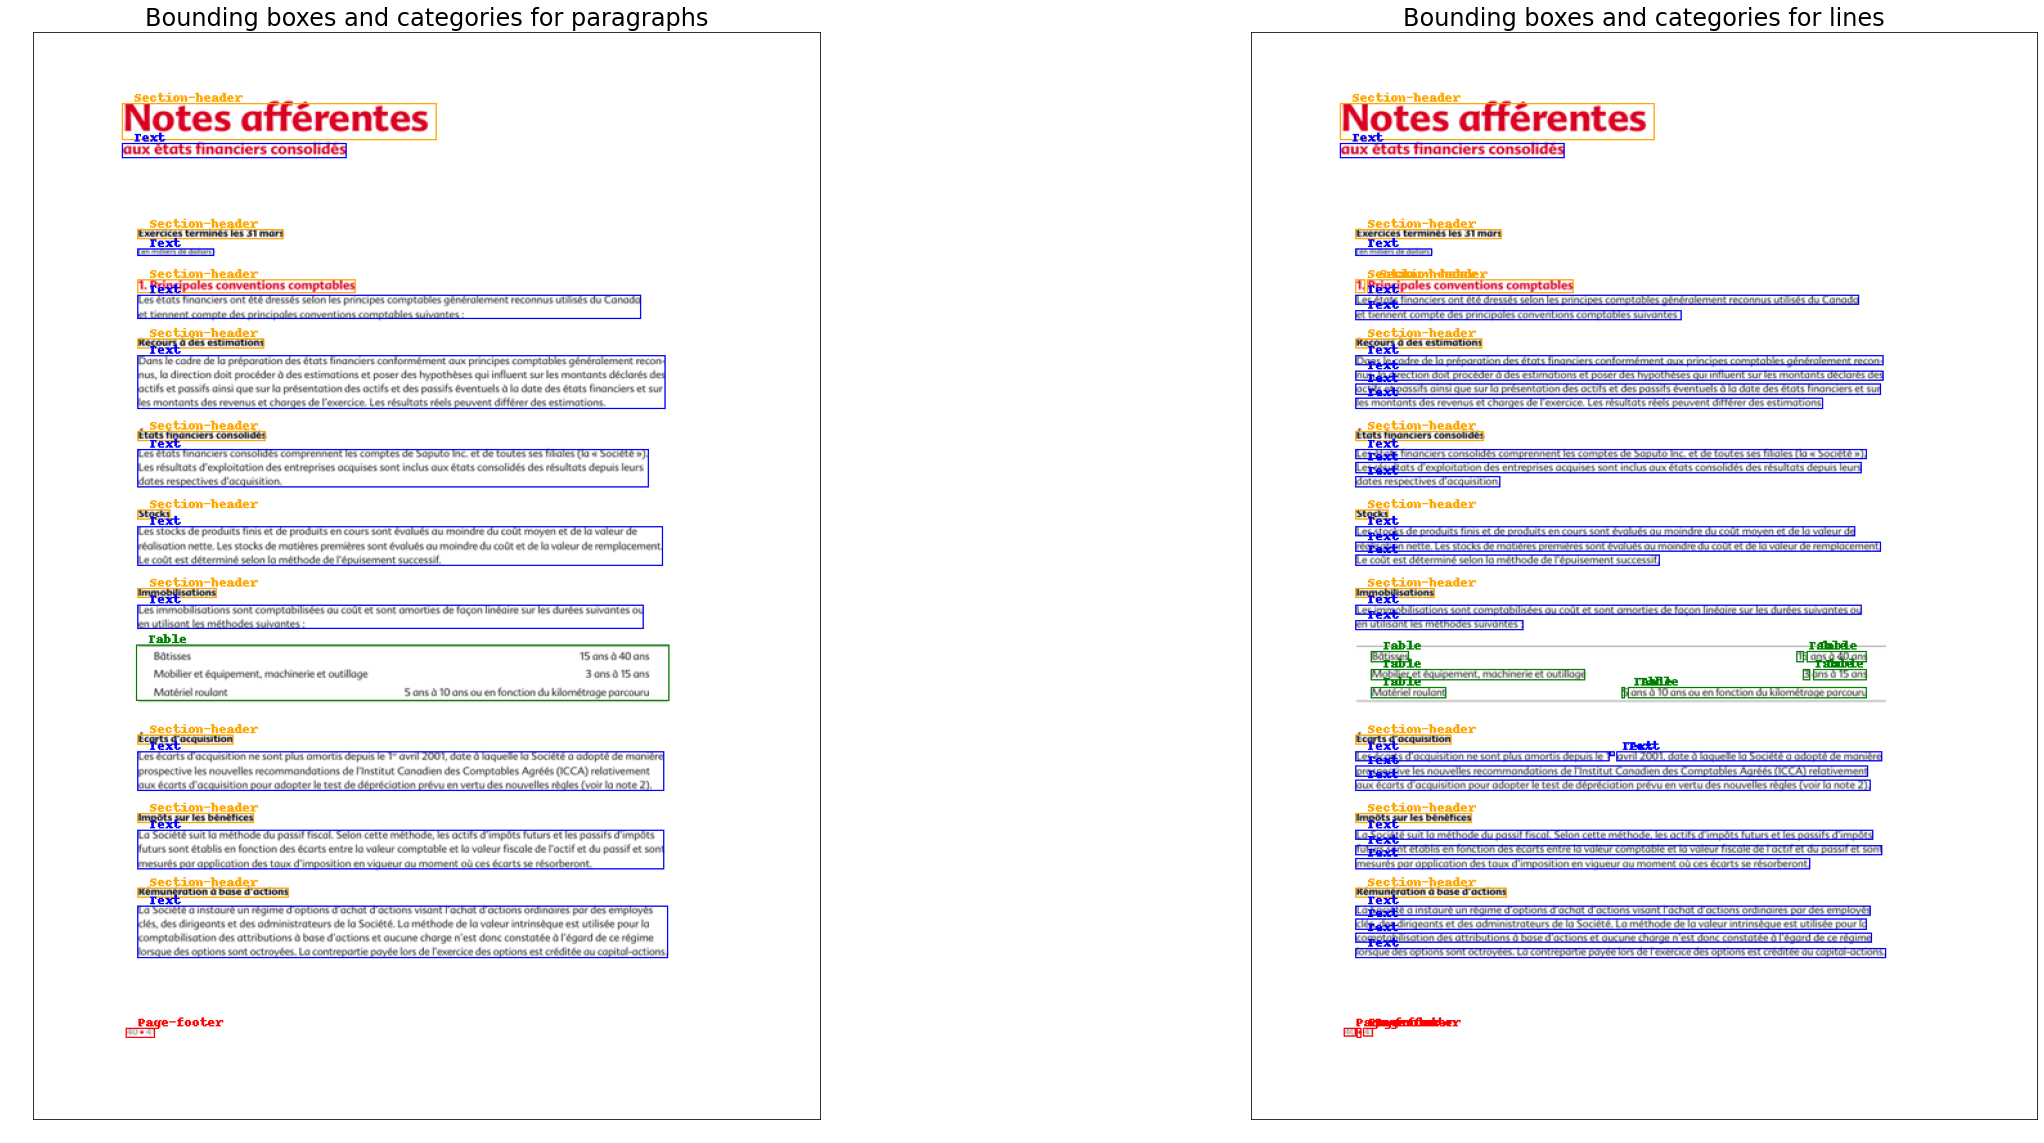

In [40]:
from PIL import Image, ImageDraw, ImageFont
import random
import matplotlib.pyplot as plt
%matplotlib inline

font = ImageFont.load_default()

# get randomly an image
example = dataset_small["train"]
image_files = example["image"]
index = random.randint(0, len(image_files))
image = image_files[index] # original image
coco_width, coco_height = example[index]["coco_width"], example[index]["coco_height"]
original_width, original_height = example[index]["original_width"], example[index]["original_height"]

# resize image to original
image = image.resize((original_width, original_height))

# get corresponding annotation
texts = example[index]["texts"]
bboxes_block = example[index]["bboxes_block"]
bboxes_line = example[index]["bboxes_line"]
categories = example[index]["categories"]

# convert boxes to original
original_bboxes_block = [original_box(convert_box(box), original_width, original_height, coco_width, coco_height) for box in bboxes_block]
original_bboxes_line = [original_box(convert_box(box), original_width, original_height, coco_width, coco_height) for box in bboxes_line]
original_bboxes = [original_bboxes_block, original_bboxes_line]

# display images
plt.figure(figsize=(40,20), facecolor="w")
columns = 2
images = [image.copy(), image.copy()]
num_imgs = len(images)
for i, img in enumerate(images):
    
    plt.subplot(1, columns, i + 1)
    if i == 0:
        plt.title(f"Bounding boxes and categories for paragraphs", fontsize=24)
    else:
        plt.title(f"Bounding boxes and categories for lines", fontsize=24)
    draw = ImageDraw.Draw(img)
    
    for box, label_idx, text in zip(original_bboxes[i], categories, texts):
        label = id2label[label_idx]
        color = label2color[label]
        draw.rectangle(box, outline=color)
        text = text.encode('latin-1', 'replace').decode('latin-1') # https://stackoverflow.com/questions/56761449/unicodeencodeerror-latin-1-codec-cant-encode-character-u2013-writing-to
        draw.text((box[0] + 10, box[1] - 10), text=label, fill=color, font=font)
    
    plt.xticks(color="white")
    plt.yticks(color="white")
    plt.tick_params(bottom = False)
    plt.tick_params(left = False)

    plt.imshow(img)

# END